In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [3]:
classifier = Sequential()
classifier.add(Flatten(input_shape=X_train.shape[1:]))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(1, activation='sigmoid'))

In [4]:
classifier.compile(optimizer='adam',
             loss='binary_crossentropy', metrics=['accuracy'])

r=classifier.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 3s 162ms/step - loss: 1.4581 - accuracy: 0.7263 - val_loss: 0.5170 - val_accuracy: 0.8770
Epoch 2/10
18/18 [==============================] - 2s 133ms/step - loss: 0.7289 - accuracy: 0.8427 - val_loss: 0.4740 - val_accuracy: 0.8673
Epoch 3/10
18/18 [==============================] - 2s 120ms/step - loss: 0.4532 - accuracy: 0.9036 - val_loss: 0.4620 - val_accuracy: 0.8803
Epoch 4/10
18/18 [==============================] - 2s 121ms/step - loss: 0.3598 - accuracy: 0.9305 - val_loss: 0.5834 - val_accuracy: 0.8608
Epoch 5/10
18/18 [==============================] - 2s 122ms/step - loss: 0.3256 - accuracy: 0.9383 - val_loss: 0.5783 - val_accuracy: 0.8738
Epoch 6/10
18/18 [==============================] - 2s 122ms/step - loss: 0.2142 - accuracy: 0.9679 - val_loss: 0.5403 - val_accuracy: 0.8673
Epoch 7/10
18/18 [==============================] - 2s 123ms/step - loss: 0.2110 - accuracy: 0.9696 - val_loss: 0.5081 - val_accuracy: 0.8544
Epoch 

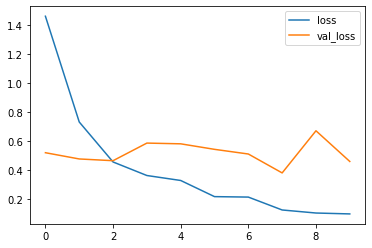

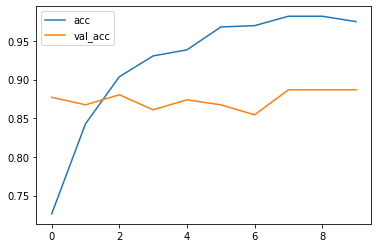

In [5]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()